# FBI Hate Crime 2013

## Objectives:
### 1. find out which among the us states has the most occurence in hate crime
### 2. find out which state records most in the hate crimes categories
### 3. find out which hate crime category was alarming in the US

## Codes


### Showing my data set

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# loading the dataset chosen by me
hatecrime_data = pd.read_csv('fbi-hate-crime-statistics-2013.csv')
hatecrime_data.index += 1 # making the index start in 1
hatecrime_data = hatecrime_data.dropna() # perform data imputation
hatecrime_data

,State,Agency type,Agency name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population
1,Alabama,Cities,Florence,2,0,0,0,0,0,0.0,0.0,1.0,0.0,1.0,"39,481"
2,Alabama,Cities,Hoover,0,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0,"84,139"
3,Alabama,Cities,Prattville,2,0,0,0,0,0,0.0,1.0,0.0,1.0,0.0,"35,154"
4,Alabama,Cities,Tuscaloosa,1,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,"94,126"
5,Alaska,Cities,Anchorage,8,0,0,0,0,0,0.0,2.0,3.0,3.0,0.0,"299,455"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,Wisconsin,Cities,River Falls,2,0,0,0,0,0,0.0,2.0,0.0,0.0,0.0,"15,227"
1817,Wisconsin,Cities,Sparta,1,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,"9,623"
1818,Wisconsin,Cities,Wausau,1,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,"39,176"
1819,Wisconsin,Universities and Colleges,"University of Wisconsin, Platteville",0,1,2,0,0,0,0.0,3.0,0.0,0.0,0.0,"8,668"


### Descriptive analysis of my dataset

In [131]:
#getting the total recorded hate crimes per state with their category


states = list(set(hatecrime_data['State'])) # getting the list of states from the original data set
hatecrime_state_list = {} # setup for the gathering of data fremae


for states in states: # loop for iterating over the states in the us
    a = pd.DataFrame(hatecrime_data[hatecrime_data['State'] == states])
    hatecrime_state_list[states] = []
    for category in ['Race','Religion','Sexual orientation','Ethnicity','Disability','Gender Identity']: # loop for getting the recorded hate crimes in a given state per category
        hatecrime_state_list[states].append(np.sum(a[category]))
    hatecrime_state_list[states].append(np.sum(hatecrime_state_list[states])) # adding the sum of hate crimes per state
        
hatecrime_perstate_df = pd.DataFrame(hatecrime_state_list) # putting the dictionary result as data frame

hatecrime_perstate_df = hatecrime_perstate_df.rename(index = {0:'Race',1:'Religion',2:'Sexual orientation',
                                                              3:'Ethnicity',4:'Disability',5:'Gender Identity',6:'Total'})

hatecrime_perstate_flipped_df = hatecrime_perstate_df.transpose() # flips my dataframe
hatecrime_perstate_flipped_df

,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender Identity,Total
Illinois,52.0,7.0,27.0,6.0,0.0,0.0,92.0
North_Carolina,56.0,10.0,20.0,8.0,0.0,0.0,94.0
Alaska,8.0,0.0,0.0,0.0,0.0,0.0,8.0
Texas,49.0,6.0,40.0,21.0,2.0,0.0,118.0
Delaware,6.0,0.0,2.0,0.0,0.0,0.0,8.0
DC,18.0,6.0,31.0,3.0,0.0,12.0,70.0
Maine,10.0,3.0,9.0,0.0,0.0,0.0,22.0
Kentucky,88.0,4.0,27.0,12.0,4.0,0.0,135.0
Nebraska,12.0,5.0,7.0,4.0,0.0,0.0,28.0
Georgia,9.0,2.0,15.0,2.0,1.0,0.0,29.0


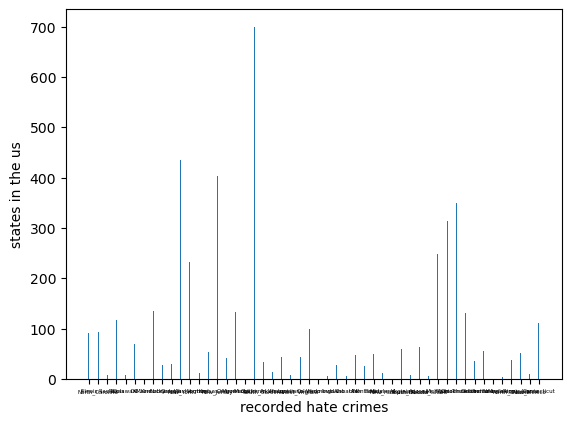

In [120]:
#visual representation of the total recorded hate crimes per state
total_hatecrimes_perstate_bg = []
states = list(set(hatecrime_data['State']))

for state in states: # getting the total hatecrimes perstate and put it in the bar graph
    total_hatecrimes_perstate_bg.append(np.sum(hatecrime_state_list[state]))    
plt.bar(states,total_hatecrimes_perstate_bg ,width = 0.1)

plt.xlabel("recorded hate crimes")
plt.ylabel("states in the us")
plt.xticks(fontsize=4)
plt.show()

#### US State with the most hate crimes recorded in 2013

In [154]:
state_withmost_recordedHatecrime = hatecrime_perstate_flipped_df.sort_values(by='Total',ascending=False) # sorting the data frame
state_withmost_recordedHatecrime['Total'].head(10)

California       699.0
New_York         434.0
New_Jersey       403.0
Massachusetts    349.0
Ohio             314.0
Michigan         248.0
Washington       232.0
Kentucky         135.0
Minnesota        134.0
Tennessee        132.0
Name: Total, dtype: float64

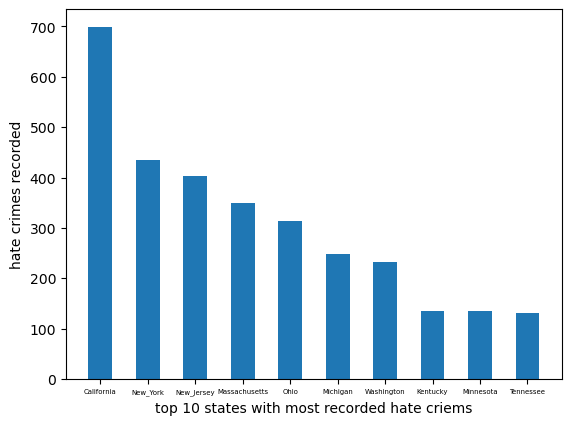

In [159]:
plt.bar(state_withmost_recordedHatecrime.index[:10],state_withmost_recordedHatecrime['Total'].head(10) ,width = 0.5)

plt.xlabel("top 10 states with most recorded hate criems")
plt.ylabel("hate crimes recorded")
plt.xticks(fontsize=5)
plt.show()

#### US State with the most hate crime on race

In [162]:
state_withmost_recordedHatecrimeonRace = hatecrime_perstate_flipped_df.sort_values(by='Race',ascending=False) # sorting the data frame
state_withmost_recordedHatecrimeonRace['Race'].head(10)

California       304.0
Ohio             200.0
New_Jersey       180.0
Michigan         164.0
Massachusetts    146.0
Washington       133.0
New_York         102.0
Kentucky          88.0
Minnesota         79.0
Connecticut       58.0
Name: Race, dtype: float64

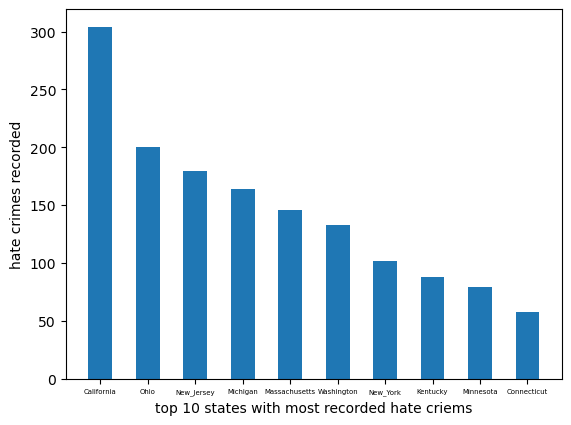

In [167]:
plt.bar(state_withmost_recordedHatecrimeonRace.index[:10],state_withmost_recordedHatecrimeonRace['Race'][:10] ,width = 0.5)

plt.xlabel("top 10 states with most recorded hate crimes on race")
plt.ylabel("hate crimes recorded")
plt.xticks(fontsize=5)
plt.show()

#### US State with most hate crime on religion

In [169]:
state_withmost_recordedHatecrimeonReli = hatecrime_perstate_flipped_df.sort_values(by='Religion',ascending=False) # sorting the data frame
state_withmost_recordedHatecrimeonReli['Religion'].head(10)

New_York         190.0
California       121.0
New_Jersey       121.0
Massachusetts     64.0
Washington        34.0
Michigan          33.0
Minnesota         19.0
Arizona           15.0
Colorado          14.0
Virginia          13.0
Name: Religion, dtype: float64

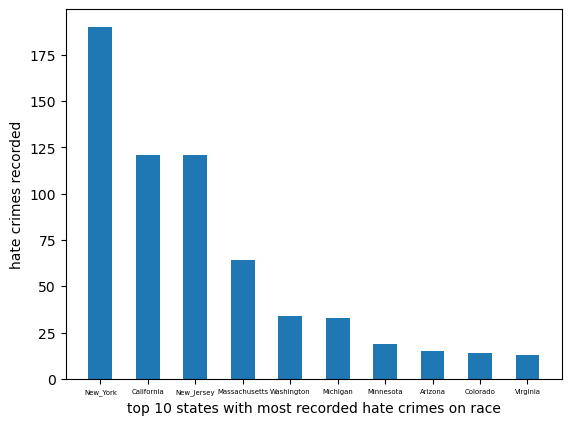

In [171]:
plt.bar(state_withmost_recordedHatecrimeonReli.index[:10],state_withmost_recordedHatecrimeonReli['Religion'][:10] ,width = 0.5)

plt.xlabel("top 10 states with most recorded hate crimes on race")
plt.ylabel("hate crimes recorded")
plt.xticks(fontsize=5)
plt.show()

#### US State with most hate crime on Sexual orientation

In [172]:
state_withmost_recordedHatecrimeonSexor = hatecrime_perstate_flipped_df.sort_values(by='Sexual orientation',ascending=False) # sorting the data frame
state_withmost_recordedHatecrimeonSexor['Sexual orientation'].head(10)

California       176.0
New_York         109.0
Massachusetts     91.0
New_Jersey        60.0
Ohio              52.0
Texas             40.0
Washington        37.0
Michigan          35.0
Colorado          34.0
Tennessee         33.0
Name: Sexual orientation, dtype: float64

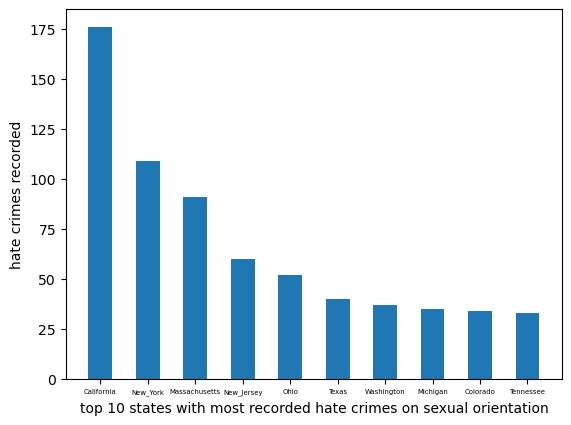

In [173]:
plt.bar(state_withmost_recordedHatecrimeonSexor.index[:10],state_withmost_recordedHatecrimeonSexor['Sexual orientation'][:10] ,width = 0.5)

plt.xlabel("top 10 states with most recorded hate crimes on sexual orientation")
plt.ylabel("hate crimes recorded")
plt.xticks(fontsize=5)
plt.show()

#### US State with most hate crime on Ethnicity

In [174]:
state_withmost_recordedHatecrimeonEthnicity = hatecrime_perstate_flipped_df.sort_values(by='Ethnicity',ascending=False) # sorting the data frame
state_withmost_recordedHatecrimeonEthnicity['Ethnicity'].head(10)

California       91.0
Massachusetts    42.0
New_Jersey       38.0
Tennessee        38.0
Ohio             31.0
New_York         27.0
Washington       22.0
Texas            21.0
Connecticut      20.0
Michigan         13.0
Name: Ethnicity, dtype: float64

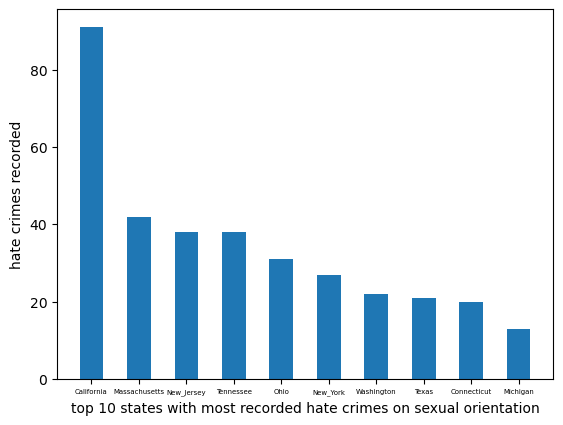

In [176]:
plt.bar(state_withmost_recordedHatecrimeonEthnicity.index[:10],state_withmost_recordedHatecrimeonEthnicity['Ethnicity'][:10] ,width = 0.5)

plt.xlabel("top 10 states with most recorded hate crimes on Ethnicity")
plt.ylabel("hate crimes recorded")
plt.xticks(fontsize=5)
plt.show()

#### US States with most hate crimes on Disability

In [177]:
state_withmost_recordedHatecrimeonDisability = hatecrime_perstate_flipped_df.sort_values(by='Disability',ascending=False) # sorting the data frame
state_withmost_recordedHatecrimeonDisability['Disability'].head(10)

Ohio             20.0
Tennessee         8.0
Washington        5.0
Kentucky          4.0
New_Jersey        4.0
Connecticut       3.0
Michigan          3.0
Massachusetts     3.0
Texas             2.0
New_York          2.0
Name: Disability, dtype: float64

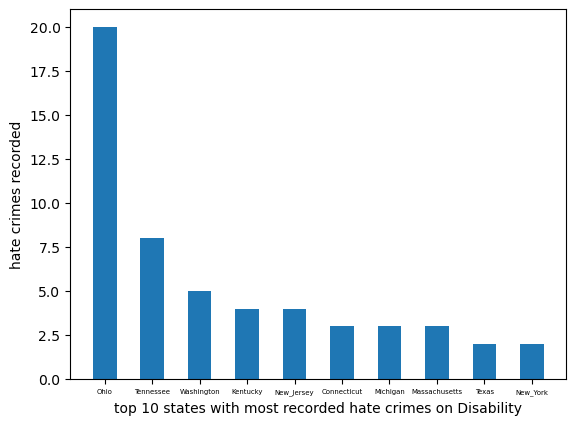

In [179]:
plt.bar(state_withmost_recordedHatecrimeonDisability.index[:10],state_withmost_recordedHatecrimeonDisability['Disability'][:10] ,width = 0.5)

plt.xlabel("top 10 states with most recorded hate crimes on Disability")
plt.ylabel("hate crimes recorded")
plt.xticks(fontsize=5)
plt.show()

#### US States with most hate crime on Gender Identity

In [180]:
state_withmost_recordedHatecrimeonGenderIdentity = hatecrime_perstate_flipped_df.sort_values(by='Gender Identity',ascending=False) # sorting the data frame
state_withmost_recordedHatecrimeonGenderIdentity['Gender Identity'].head(10)

DC               12.0
California        6.0
New_York          4.0
Massachusetts     3.0
Missouri          2.0
Washington        1.0
Tennessee         1.0
Rhode_Island      0.0
Montana           0.0
Florida           0.0
Name: Gender Identity, dtype: float64

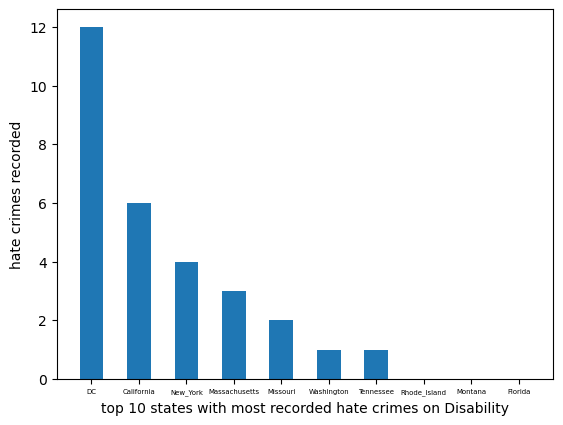

In [182]:
plt.bar(state_withmost_recordedHatecrimeonGenderIdentity.index[:10],state_withmost_recordedHatecrimeonGenderIdentity['Gender Identity'][:10] ,width = 0.5)

plt.xlabel("top 10 states with most recorded hate crimes on Disability")
plt.ylabel("hate crimes recorded")
plt.xticks(fontsize=5)
plt.show()

### getting the data analysis from my data set

In [86]:
hatecrime_sum_data = []

for column_name in hatecrime_data.keys(): # loop for getting the sum of any occurences of hate crime
    if column_name == 'State' or column_name == 'Agency type' or column_name == 'Agency name' or column_name == 'Gender' or column_name == 'State' or column_name == '1st quarter' or column_name == '2nd quarter'or column_name == '3rd quarter' or column_name == '4th quarter' or column_name == 'Population':
        continue
    hatecrime_sum_data.append(np.sum(hatecrime_data[column_name]))

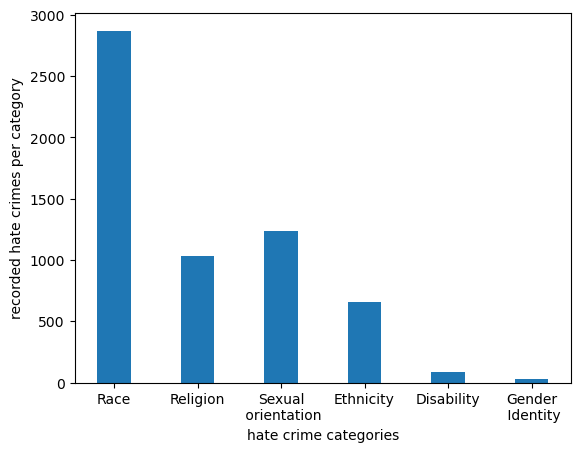

In [74]:
# putting the sum of the hate crimes in a bar graph
types = ['Race', 'Religion','Sexual\n orientation','Ethnicity','Disability','Gender\n Identity']


# putting the the data gathered in the bargraph
plt.bar(types, hatecrime_sum_data, width = 0.4)

#labeling the the x and the y axis in the bar graph
plt.xlabel("hate crime categories")
plt.ylabel("recorded hate crimes per category")

plt.show()

#### getting the standard deviation of the data set

In [75]:
hatecrime_std_data = []
    
for column_name in hatecrime_data.keys(): # loop for getting the sum of any occurences of hate crime
    if column_name == 'State' or column_name == 'Agency type' or column_name == 'Agency name' or column_name == 'Gender' or column_name == 'State' or column_name == '1st quarter' or column_name == '2nd quarter'or column_name == '3rd quarter' or column_name == '4th quarter' or column_name == 'Population':
        continue
    hatecrime_std_data.append(np.std(hatecrime_data[column_name]))


### putting all the data analysis that I used in a table

In [76]:
hatecrime_dataanalysis = [] # initialization of datas in the data analysis

# putting a specific data analysis in the data analysis type
hatecrime_dataanalysis.append(hatecrime_sum_data)
hatecrime_dataanalysis.append(hatecrime_std_data)

# making the table for the data analysis
hatecrime_dataanalysis_table = pd.DataFrame(hatecrime_dataanalysis,columns=['Race', 'Religion','Sexual orientation','Ethnicity','Disability','Gender Identity'])
hatecrime_dataanalysis_table = hatecrime_dataanalysis_table.rename(index = {0 : '# of hate crimes per type',1: 'Standard Deviation'})

# calling the data analysis
hatecrime_dataanalysis_table

,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender Identity
# of hate crimes per type,2872.000000,1032.000000,1237.000000,655.00000,83.000000,31.000000
Standard Deviation,4.412091,4.333423,3.610526,1.13458,0.397711,0.352404


### Correlation of the data sets

In [77]:
hatecrime_data.corr(numeric_only=True)

,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter
Race,1.000000,0.427855,0.668137,0.689371,0.532713,0.282549,0.726662,0.782943,0.858150,0.735989
Religion,0.427855,1.000000,0.842160,0.511809,0.099751,0.166654,0.761649,0.800378,0.742955,0.858389
Sexual orientation,0.668137,0.842160,1.000000,0.660240,0.194405,0.412016,0.904471,0.921210,0.863618,0.879999
Ethnicity,0.689371,0.511809,0.660240,1.000000,0.459192,0.229154,0.702325,0.707004,0.746026,0.724044
Disability,0.532713,0.099751,0.194405,0.459192,1.000000,0.018967,0.189342,0.251577,0.503283,0.417070
Gender Identity,0.282549,0.166654,0.412016,0.229154,0.018967,1.000000,0.405627,0.365202,0.312762,0.241269
1st quarter,0.726662,0.761649,0.904471,0.702325,0.189342,0.405627,1.000000,0.871127,0.807235,0.805685
2nd quarter,0.782943,0.800378,0.921210,0.707004,0.251577,0.365202,0.871127,1.000000,0.865989,0.851797
3rd quarter,0.858150,0.742955,0.863618,0.746026,0.503283,0.312762,0.807235,0.865989,1.000000,0.899315
4th quarter,0.735989,0.858389,0.879999,0.724044,0.417070,0.241269,0.805685,0.851797,0.899315,1.000000


### Data sets with correlations (graphical representaiton

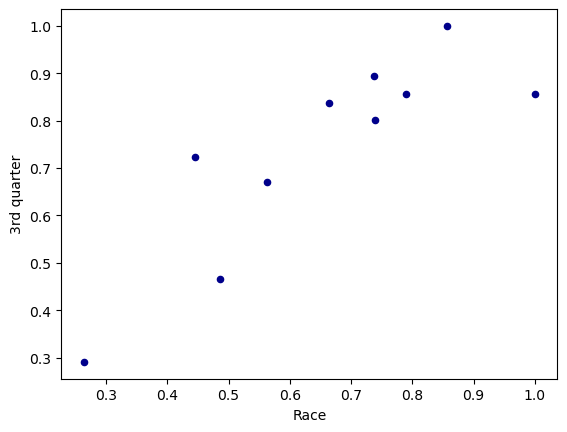

In [78]:
# making a dataframe of the correlation data above
corr_df = pd.DataFrame(hatecrime_correlation)

# making the scatter plot for the race 
ax1 = corr_df.plot.scatter(x='Race',
                      y='3rd quarter',
                      c='DarkBlue')

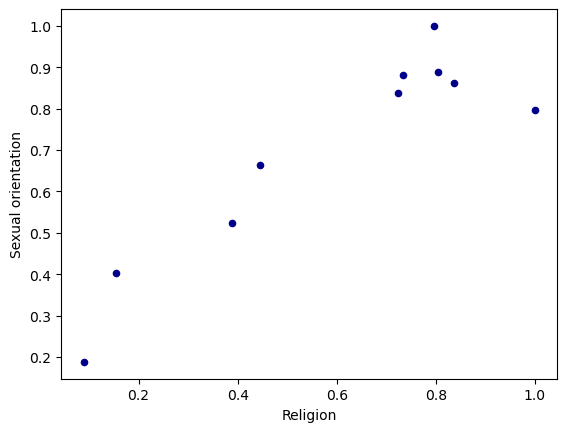

In [79]:
ax2 = corr_df.plot.scatter(x='Religion',
                      y='Sexual orientation',
                      c='DarkBlue')

## Conclusions
1. we've concluded that calofornia are the not so friendliest state in the us
2. we've concluded that california are some of the most racist, homophobic state in the us
3. we've concluded that washing dc are not so welcoming on gender identity
4. we've concluded that ohio is not very understanding in terms of people with disability
5. we've concluded that new york often discriminates on religion
6. we've concluded that US hates people by their races